# Analysis of Historical Airplane Crashes

#### Data Set URL: https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import date, timedelta, datetime
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns


In [4]:
df = pd.read_csv("airplane_crashes_and_fatalities_since_1908.csv")

In [5]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [6]:
df.shape

(5268, 13)

In [7]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [8]:
df.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [9]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [10]:
#Clean up time 
df["Time"] = df["Time"].replace(np.nan, "Unknown") 
df["Time"] = df["Time"].str.replace("114:20:00", "Unknown")
df["Time"] = df["Time"].str.replace("18.40", "18:40")
df["Time"] = df["Time"].str.replace("0943", "09:43")
df["Time"] = df["Time"].str.replace("12\'20", "12:20")
df["Time"] = df["Time"].str.replace("22\'08", "22:08")
df["Time"] = df["Time"].str.replace("c: ", "")
df["Time"] = df["Time"].str.replace("c:", "")
df["Time"] = df["Time"].str.replace("c", "")

#Match upper/lower case formats
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

#Create new columns for month, day, year, hour, and minute
    
df['Date']=pd.to_datetime(df['Date'])
df['Day'] = df['Date'].map(lambda x: x.day)
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

#Convert Time into date_time format so I can pull hour or minute individually

df['Time'] = pd.to_datetime( df['Time'], format='H%:M%', errors = "ignore")
df['Date'] = pd.to_datetime(df['Date'], format='Y%:m%:D%', errors = 'ignore')

In [11]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Day,Year,Month
0,1908-09-17,17:18,"FORT MYER, VIRGINIA",MILITARY - U.S. ARMY,NaN,DEMONSTRATION,WRIGHT FLYER III,NaN,1,2.0,1.0,0.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY...",17,1908,9
1,1912-07-12,6:30,"ATLANTICITY, NEW JERSEY",MILITARY - U.S. NAVY,NaN,TEST FLIGHT,DIRIGIBLE,NaN,NaN,5.0,5.0,0.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...,12,1912,7
2,1913-08-06,UNKNOWN,"VICTORIA, BRITISH COLUMBIA, CANADA",PRIVATE,-,NaN,CURTISS SEAPLANE,NaN,NaN,1.0,1.0,0.0,THE FIRST FATAL AIRPLANE ACCIDENT IN CANADA OC...,6,1913,8
3,1913-09-09,18:30,OVER THE NORTH SEA,MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-1 (AIRSHIP),NaN,NaN,20.0,14.0,0.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...,9,1913,9
4,1913-10-17,10:30,"NEAR JOHANNISTHAL, GERMANY",MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-2 (AIRSHIP),NaN,NaN,30.0,30.0,0.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...,17,1913,10


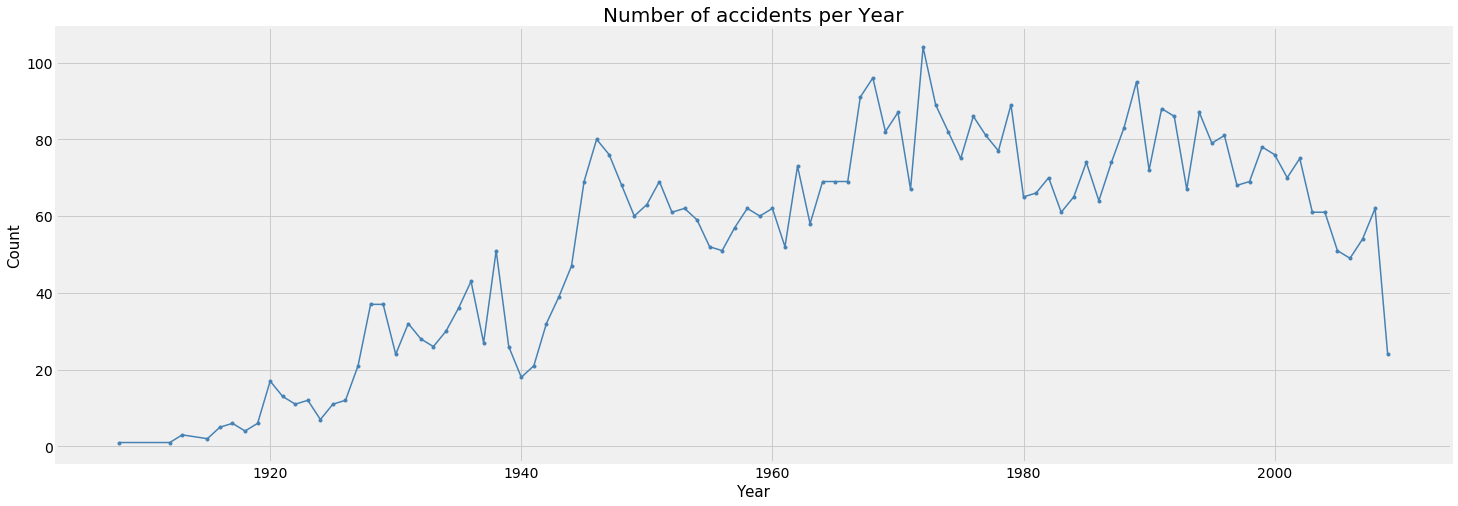

In [12]:
#Create line Chart showing Crashes per year
year_crashed = df.groupby("Year")[['Date']].count()
year_crashed = year_crashed.rename(columns={"Date" : "Count"})

#Label and format line Chart 
plt.figure(figsize=(25,8))
plt.style.use('fivethirtyeight')
plt.plot(year_crashed.index, 'Count', data=year_crashed, color='steelblue', marker = ".", linewidth=1.5)
plt.title('Number of accidents per Year', loc='Center', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.savefig("Images/Crashes_per_Year.png")
plt.show()

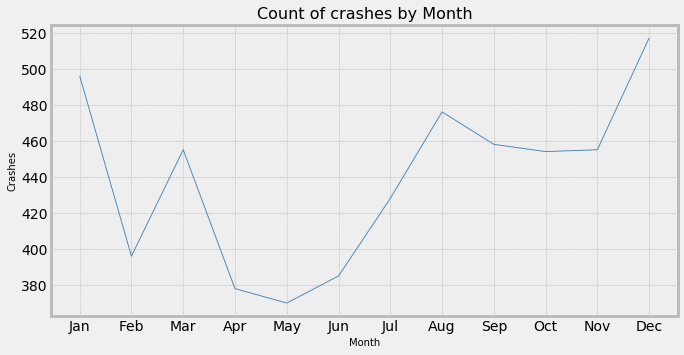

In [13]:
#Creating line chart for Crashes by Month 

plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.plot(df.groupby("Month")[['Date']].count().index, 'Date', data=df.groupby("Month")[['Date']].count(), color='steelblue',marker='', linewidth=.9)
plt.xticks(df.groupby("Month")[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Crashes', fontsize=10)
plt.title('Count of crashes by Month', loc='Center', fontsize=16)
plt.savefig("Images/Crashes_by_Month.png")

In [14]:

#Crashes are more common in the winter

## Top Ten Opertaors with Crashes

Gathering information for Top 10 Operators and Airplane Types that have crashed

In [15]:
#creating data frame with just operator and type
df1 = df[['Operator', 'Type']]

In [16]:
df1.head()

,Operator,Type
0,MILITARY - U.S. ARMY,WRIGHT FLYER III
1,MILITARY - U.S. NAVY,DIRIGIBLE
2,PRIVATE,CURTISS SEAPLANE
3,MILITARY - GERMAN NAVY,ZEPPELIN L-1 (AIRSHIP)
4,MILITARY - GERMAN NAVY,ZEPPELIN L-2 (AIRSHIP)


In [17]:
# Calculating the operators that have have had the most crashes
# grouping operator and counting number of crashes
# then sorting those values to get the top 10 operators

operator_count = df1.groupby(["Operator"])['Operator'].count()
operator_count = operator_count.rename(columns={'Operator': 'Count'})
operator_count.sort_values(ascending=False).head(10)

Operator
AEROFLOT                               179
MILITARY - U.S. AIR FORCE              176
AIR FRANCE                              70
DEUTSCHE LUFTHANSA                      65
AIR TAXI                                48
CHINA NATIONAL AVIATION CORPORATION     44
UNITED AIR LINES                        44
MILITARY - U.S. ARMY AIR FORCES         43
PAN AMERICAN WORLD AIRWAYS              41
AMERICAN AIRLINES                       36
dtype: int64

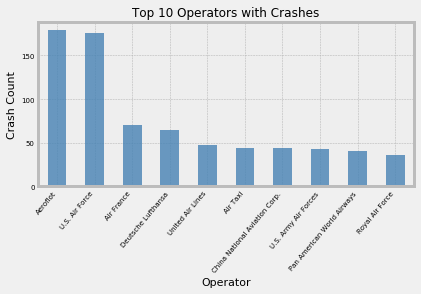

In [18]:
# Creating bar chart to reflect Top 10 Operators
xticklabels = ['Aeroflot', 'U.S. Air Force', 'Air France', 'Deutsche Lufthansa', 
               'United Air Lines', 'Air Taxi','China National Aviation Corp.', 'U.S. Army Air Forces', 
               'Pan American World Airways', 'Royal Air Force']
opr_chart= operator_count.sort_values(ascending=False)[:10].plot(kind='bar', color=('steelblue'), alpha=0.8, fontsize=7)
opr_chart.set_xlabel("Operator", fontsize=11)
opr_chart.set_ylabel("Crash Count", fontsize=11)
opr_chart.set_title("Top 10 Operators with Crashes", fontsize=12)
opr_chart.set_xticklabels(xticklabels, rotation = 50, ha="right")
plt.gcf().subplots_adjust(bottom=0.31)
plt.savefig("Images/Top_Ten_Operator_Crashes.png")
plt.show()

## Top Ten Airplane Types that have crashed


In [19]:
# Calculating the Airplane Types that have have had the most crashes
# grouping Types and counting number of crashes
# then sorting those values to get the top 10 Airplane Types

type_count = df1.groupby(["Type"])['Type'].count()
type_count = type_count.rename(columns={'Type': 'Count'})
type_count.sort_values(ascending=False).head(10)


Type
DOUGLAS DC-3                                334
DE HAVILLAND CANADA DHC-6 TWIN OTTER 300     81
DOUGLAS C-47A                                74
DOUGLAS C-47                                 62
DOUGLAS DC-4                                 40
YAKOVLEV YAK-40                              38
ANTONOV AN-26                                38
JUNKERS JU-52/3M                             37
DOUGLAS C-47B                                29
DE HAVILLAND DH-4                            28
dtype: int64

In [20]:
# creating new dataframe with just the Operator and Type counts
updated_df1 = pd.DataFrame({
    "Operator": operator_count,
    "Types": type_count})

updated_df1.head()

,Operator,Types
A B AEROTRANSPORT,2.0,NaN
AAC-1 TOUCAN,NaN,1.0
AAXICO AIRLINES,3.0,NaN
AB AEROTRANSPORT,3.0,NaN
ABABEEL AVIAITION,1.0,NaN


In [21]:
# sorting Type values to get the top 10 that have crashed
updated_df1.sort_values(by='Types', ascending=False).head(10)

,Operator,Types
DOUGLAS DC-3,NaN,334.0
DE HAVILLAND CANADA DHC-6 TWIN OTTER 300,NaN,81.0
DOUGLAS C-47A,NaN,74.0
DOUGLAS C-47,NaN,62.0
DOUGLAS DC-4,NaN,40.0
ANTONOV AN-26,NaN,38.0
YAKOVLEV YAK-40,NaN,38.0
JUNKERS JU-52/3M,NaN,37.0
DOUGLAS C-47B,NaN,29.0
DE HAVILLAND DH-4,NaN,28.0


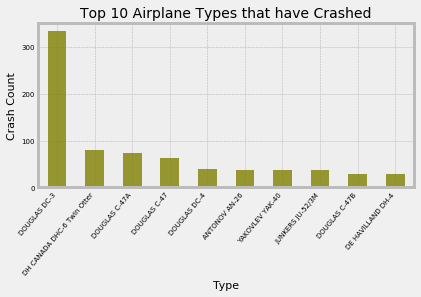

In [22]:
# Creating bar chart to reflect Top 10 Operators
xticklabels = ['DOUGLAS DC-3', 'DH CANADA DHC-6 Twin Otter', 'DOUGLAS C-47A', 'DOUGLAS C-47', 
               'DOUGLAS DC-4', 'ANTONOV AN-26','YAKOVLEV YAK-40', 'JUNKERS JU-52/3M', 
               'DOUGLAS C-47B', 'DE HAVILLAND DH-4']
type_chart= type_count.sort_values(ascending=False)[:10].plot(kind='bar', color= 'olive', alpha=0.8,fontsize=7)
type_chart.set_xlabel("Type", fontsize=11)
type_chart.set_ylabel("Crash Count", fontsize=11)
type_chart.set_title("Top 10 Airplane Types that have Crashed", fontsize=14)
type_chart.set_xticklabels(xticklabels, rotation = 50, ha="right") 
plt.gcf().subplots_adjust(bottom=0.31)
plt.savefig("Images/Top_10_Airplane_Types_Crash.png")
plt.show()

## Fatalities vs Total number of people aboard plane


In [23]:
#creating data frame with just operator, people aboard, fatalities and ground
df2 = df[['Operator', 'Aboard', 'Fatalities', 'Ground']]

In [24]:
# Grouping by Operator
df2.groupby(['Operator']).max()
df2.head(10)

,Operator,Aboard,Fatalities,Ground
0,MILITARY - U.S. ARMY,2.0,1.0,0.0
1,MILITARY - U.S. NAVY,5.0,5.0,0.0
2,PRIVATE,1.0,1.0,0.0
3,MILITARY - GERMAN NAVY,20.0,14.0,0.0
4,MILITARY - GERMAN NAVY,30.0,30.0,0.0
5,MILITARY - GERMAN NAVY,41.0,21.0,0.0
6,MILITARY - GERMAN NAVY,19.0,19.0,0.0
7,MILITARY - GERMAN ARMY,20.0,20.0,0.0
8,MILITARY - GERMAN NAVY,22.0,22.0,0.0
9,MILITARY - GERMAN NAVY,19.0,19.0,0.0


In [25]:
# Calculating the fatalities for top 10 operators 
# grouping by operator and counting number of fatalities
# then sorting those values to get the number of fatalities by Operator

fatalities_count = df2.groupby(["Operator"])['Fatalities'].sum()
fatalities_count.sort_values(ascending=False).head(10)

Operator
AEROFLOT                           7156.0
MILITARY - U.S. AIR FORCE          3717.0
AIR FRANCE                         1734.0
AMERICAN AIRLINES                  1421.0
PAN AMERICAN WORLD AIRWAYS         1302.0
MILITARY - U.S. ARMY AIR FORCES    1070.0
UNITED AIR LINES                   1021.0
AVIANCA                             945.0
TURKISH AIRLINES (THY)              891.0
INDIAN AIRLINES                     863.0
Name: Fatalities, dtype: float64

In [26]:
# Calculating the total passangers aboard for top 10 operators 
# grouping by operator and counting number of passangers aboard
# then sorting those values to get the number of passangers aboard by Operator

totals_count = df2.groupby(["Operator"])['Aboard'].sum()
totals_count.sort_values(ascending=False).head(10)

Operator
AEROFLOT                      8870.0
MILITARY - U.S. AIR FORCE     4502.0
AIR FRANCE                    2874.0
PAN AMERICAN WORLD AIRWAYS    2812.0
UNITED AIR LINES              2460.0
AMERICAN AIRLINES             2063.0
PHILIPPINE AIR LINES          1712.0
CHINA AIRLINES (TAIWAN)       1590.0
TRANS WORLD AIRLINES          1577.0
INDIAN AIRLINES               1453.0
Name: Aboard, dtype: float64

In [27]:
# creating new dataframe with just the Fatalities and Total Passengers counts
updated_df2 = pd.DataFrame({
    "Fatalities": fatalities_count,
    "Total Passengers": totals_count})

updated_df2.head()

,Fatalities,Total Passengers
Operator,,
A B AEROTRANSPORT,3.0,17.0
AAXICO AIRLINES,9.0,9.0
AB AEROTRANSPORT,58.0,64.0
ABABEEL AVIAITION,4.0,4.0
ABAKAN AIRLINES,3.0,19.0


In [28]:
# sorting Fatalities and total passengers values for the top 10 operators
updated_df2.sort_values(by='Fatalities', ascending=False).head(10)

,Fatalities,Total Passengers
Operator,,
AEROFLOT,7156.0,8870.0
MILITARY - U.S. AIR FORCE,3717.0,4502.0
AIR FRANCE,1734.0,2874.0
AMERICAN AIRLINES,1421.0,2063.0
PAN AMERICAN WORLD AIRWAYS,1302.0,2812.0
MILITARY - U.S. ARMY AIR FORCES,1070.0,1100.0
UNITED AIR LINES,1021.0,2460.0
AVIANCA,945.0,1071.0
TURKISH AIRLINES (THY),891.0,964.0


In [29]:
fatal_by_Op = updated_df2.groupby('Operator')[['Fatalities']].sum()
fatal_by_Op = fatal_by_Op.rename(columns={"Operator": "Fatalities"})
fatal_by_Op = fatal_by_Op.sort_values(by='Fatalities', ascending=False)
fatal_by_OpTOP = fatal_by_Op.head(10)

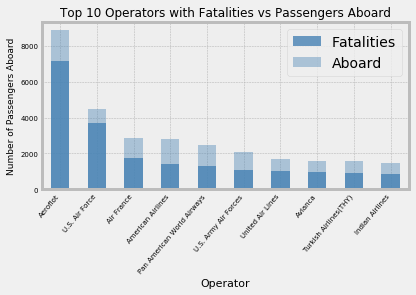

In [30]:
# Creating bar chart to reflect fatalities and total passengers for the Top 10 Operators
xticklabels = ['Aeroflot', 'U.S. Air Force', 'Air France', 'American Airlines', 
               'Pan American World Airways','U.S. Army Air Forces','United Air Lines', 'Avianca','Turkish Airlines(THY)', 
                'Indian Airlines']
fatal_chart= fatal_by_Op.sort_values(by='Fatalities', ascending=False)[:10].plot(kind='bar',color='steelblue', alpha=0.8, fontsize=7)
fatal_chart= totals_count.sort_values( ascending=False)[:10].plot(kind='bar',color = 'steelblue', alpha=0.4)
fatal_chart.set_xlabel("Operator", fontsize=11)
fatal_chart.set_ylabel("Number of Passengers Aboard", fontsize=9)
fatal_chart.set_title("Top 10 Operators with Fatalities vs Passengers Aboard", fontsize=12)
fatal_chart.set_xticklabels(xticklabels, rotation = 50, ha="right") 
plt.legend()
plt.gcf().subplots_adjust(bottom=0.30)
plt.gcf().subplots_adjust(left=0.10)
plt.savefig("Images/Top_10_Fatalities_vs_Total_Aboard.png")
plt.show()

In [31]:
#Military vs. Commercial comparison

military_df = df.copy()
military_df["crashes"]= military_df.Operator.str.contains('MILITARY')
military_df = military_df.groupby('crashes')[['crashes']].count()
military_df.index = ['Commercial', 'Military']

In [32]:
military_df

,crashes
Commercial,4469
Military,781


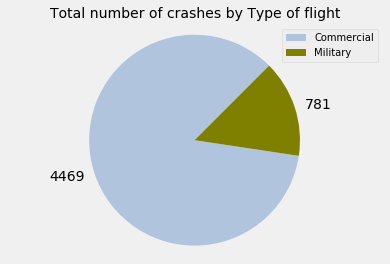

In [43]:
#creating Pie Chart to show military vs commerical crashes
plt.pie(military_df.crashes, colors = ['lightsteelblue', 'olive'], labels=military_df.crashes, startangle=45)
plt.legend(military_df.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of crashes by Type of flight', loc='Center', fontsize=14)
plt.savefig("Images/Military_vs_Commerical_Total_Crashes.png")
plt.show()

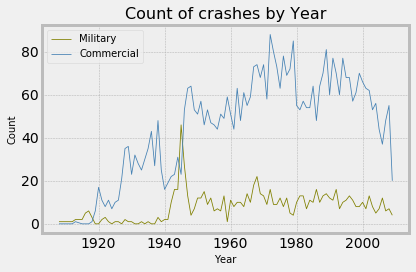

In [34]:
#Military vs Commercial crashes by year
Temp = df.copy()
Temp['Military'] = Temp.Operator.str.contains('MILITARY')
Temp['Commercial'] = Temp.Military == False
Temp = Temp.loc[:, ['Year', 'Military', 'Commercial']]
Temp = Temp.groupby('Year')[['Military', 'Commercial']].aggregate(np.count_nonzero)

#creating line Chart to show military vs commerical crashes
plt.plot(Temp.index, 'Military', data=Temp, color='olive', linewidth=.8)
plt.plot(Temp.index, 'Commercial', data=Temp, color='steelblue', linewidth=.8)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of crashes by Year', loc='Center', fontsize=16)
plt.tight_layout()
plt.savefig("Images/Military_vs_Commerical-Crashes_per_year.png")
plt.show()

In [35]:
#most crashes by locations

loc_list = Counter(df['Location'].dropna()).most_common(20)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
dangerous_locations = pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

dangerous_locations

,Crashes in this location
"SAO PAULO, BRAZIL",15
"MOSCOW, RUSSIA",15
"RIO DE JANEIRO, BRAZIL",14
"BOGOTA, COLOMBIA",13
"MANILA, PHILIPPINES",13
"ANCHORAGE, ALASKA",13
"NEW YORK, NEW YORK",12
"CAIRO, EGYPT",12
"CHICAGO, ILLINOIS",11
"NEAR MOSCOW, RUSSIA",9


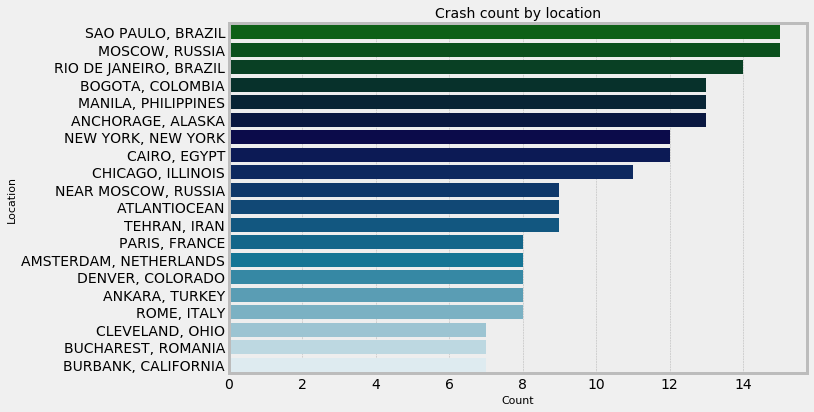

In [36]:
#creating a bar chart for Crash count by location

plt.figure(figsize=(12,6))
sns.barplot(y=dangerous_locations.index, x="Crashes in this location", data=dangerous_locations, palette="ocean", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Location', fontsize=11)
plt.title('Crash count by location', loc='Center', fontsize=14)
plt.gcf().subplots_adjust(left=0.28)
plt.savefig("Images/Top_20_Crash_by Location.png")
plt.show()

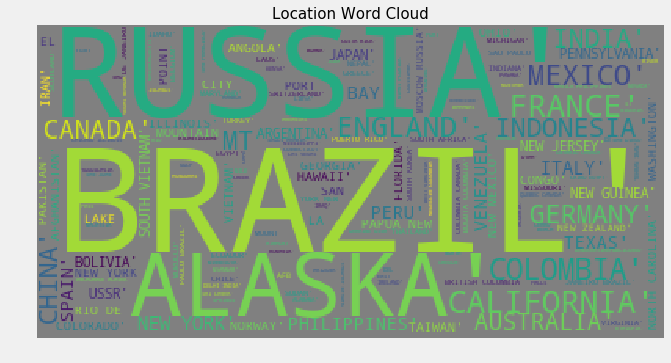

In [39]:

list = str(df.Location.tolist())

stopwords = set(STOPWORDS)
stopwords.add("off")
stopwords.add("Near")
stopwords.add("Over")
stopwords.add("of")
stopwords.add("on")
stopwords.add("'")
stopwords.add("-")
stopwords.add("\"")
stopwords.add(",")
stopwords.add(".")
stopwords.add(" -")
stopwords.add("Island")
wc = WordCloud(background_color = "grey", max_words= 2500, stopwords=stopwords)
wc.generate(list)

plt.figure(figsize=(10,10))
plt.title('Location Word Cloud', loc='Center', fontsize=15)
plt.imshow(wc) 
plt.axis("off")
plt.savefig("Images/Crashes_by_location_Visualization.png")
plt.show()

In [ ]:
operator_count = Counter(df['Operator'].dropna().tolist()).most_common(10)
operator_list = [operator[0] for operator in operator_count] 
operator_trend = df[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
operator_trend = operator_trend['Fatalities'].reset_index()

fig,ax = plt.subplots(figsize=(12,6))
plt.title('Operator trend')
plt.ylabel('Total Fatalities')
plt.xlabel('Year')
for operator in operator_list:
    operator_trend[operator_trend['Operator'] == operator].plot(x = 'Year',
                                                                y = 'sum',
                                                                linewidth=1.5,
                                                                ax=ax,
                                                                label=operator)